## 1. Installing required libraries:

In [ ]:
%pip install --upgrade pip
%pip install --disable-pip-version-check \
    torch==1.13.1 \
    torchdata==0.5.1 --quiet

%pip install \
    transformers==4.27.2 \
    datasets==2.11.0 \
    evaluate==0.4.0 \
    rouge_score==0.1.2 \
    loralib==0.1.1 \
    peft==0.3.0 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: Ignored the following yanked versions: 0.3.0a0
ERROR: Could not find a version that satisfies the requirement torchdata==0.5.1 (from versions: 0.3.0a1, 0.3.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0)
ERROR: No matching distribution found for torchdata==0.5.1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7

In [ ]:
!pip install --upgrade datasets ### if dataset throughs any error

  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
  Attempting uninstall: datasets
    Found existing installation: datasets 2.11.0
    Uninstalling datasets-2.11.0:
      Successfully uninstalled datasets-2.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.27.2 which is incompatible.


In [ ]:
from datasets import load_dataset
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, GenerationConfig, TrainingArguments, Trainer
import torch
import time
import evaluate
import pandas as pd
import numpy as np

In [ ]:
### Connecting with google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


- create your token from https://huggingface.co/settings/tokens

In [ ]:
from huggingface_hub import login
import json
with open('/content/drive/MyDrive/LLM_learning/llm_training/token.json') as f:
    key  = json.load(f)
login(token=key["llm_token"])

In [ ]:
huggingface_dataset_name = "knkarthick/dialogsum"  ### https://huggingface.co/datasets/knkarthick/dialogsum

dataset = load_dataset(huggingface_dataset_name)

dataset

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.65k [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/11.3M [00:00<?, ?B/s]

validation.csv:   0%|          | 0.00/442k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/12460 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 12460
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 500
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 1500
    })
})

In [ ]:
import pandas as pd

# View first 5 samples from each split
train_samples = dataset["train"].select(range(5))
val_samples = dataset["validation"].select(range(5))
test_samples = dataset["test"].select(range(5))

# Convert to DataFrame for better readability
df_train = pd.DataFrame(train_samples)
df_val = pd.DataFrame(val_samples)
df_test = pd.DataFrame(test_samples)

# Display the data
print("🔹 Train Samples:")
display(df_train)

print("\n🔹 Validation Samples:")
display(df_val)

print("\n🔹 Test Samples:")
display(df_test)

🔹 Train Samples:


,id,dialogue,summary,topic
0,train_0,"#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...","Mr. Smith's getting a check-up, and Doctor Haw...",get a check-up
1,train_1,"#Person1#: Hello Mrs. Parker, how have you bee...",Mrs Parker takes Ricky for his vaccines. Dr. P...,vaccines
2,train_2,"#Person1#: Excuse me, did you see a set of key...",#Person1#'s looking for a set of keys and asks...,find keys
3,train_3,#Person1#: Why didn't you tell me you had a gi...,#Person1#'s angry because #Person2# didn't tel...,have a girlfriend
4,train_4,"#Person1#: Watsup, ladies! Y'll looking'fine t...",Malik invites Nikki to dance. Nikki agrees if ...,dance



🔹 Validation Samples:


,id,dialogue,summary,topic
0,dev_0,"#Person1#: Hello, how are you doing today?\n#P...",#Person2# has trouble breathing. The doctor as...,see a doctor
1,dev_1,#Person1#: Hey Jimmy. Let's go workout later t...,#Person1# invites Jimmy to go workout and pers...,do exercise
2,dev_2,#Person1#: I need to stop eating such unhealth...,#Person1# plans to stop eating unhealthy foods...,healthy foods
3,dev_3,#Person1#: Do you believe in UFOs?\n#Person2#:...,#Person2# believes in UFOs and can see them in...,UFOs and aliens
4,dev_4,#Person1#: Did you go to school today?\n#Perso...,#Person1# didn't go to school today. #Person2#...,go to school



🔹 Test Samples:


,id,dialogue,summary,topic
0,test_0_1,"#Person1#: Ms. Dawson, I need you to take a di...",Ms. Dawson helps #Person1# to write a memo to ...,communication method
1,test_0_2,"#Person1#: Ms. Dawson, I need you to take a di...",In order to prevent employees from wasting tim...,company policy
2,test_0_3,"#Person1#: Ms. Dawson, I need you to take a di...",Ms. Dawson takes a dictation for #Person1# abo...,dictation
3,test_1_1,#Person1#: You're finally here! What took so l...,#Person2# arrives late because of traffic jam....,public transportation
4,test_1_2,#Person1#: You're finally here! What took so l...,#Person2# decides to follow #Person1#'s sugges...,transportation


### 2. Load Google FLAN T5 model:

In [ ]:
model_name='google/flan-t5-base'

original_model = AutoModelForSeq2SeqLM.from_pretrained(model_name, torch_dtype=torch.bfloat16)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [ ]:
def print_number_of_trainable_model_parameters(model):
    trainable_model_params = 0
    all_model_params = 0
    for _, param in model.named_parameters():
        all_model_params += param.numel()
        if param.requires_grad:
            trainable_model_params += param.numel()
    return f"trainable model parameters: {trainable_model_params}\nall model parameters: {all_model_params}\npercentage of trainable model parameters: {100 * trainable_model_params / all_model_params:.2f}%"

print(print_number_of_trainable_model_parameters(original_model))

trainable model parameters: 247577856
all model parameters: 247577856
percentage of trainable model parameters: 100.00%


#### 2.1  Test the Model with Zero Shot Inferencing:

In [ ]:
index = 100

dialogue = dataset['test'][index]['dialogue']
summary = dataset['test'][index]['summary']

prompt = f"""
Summarize the following conversation.

{dialogue}

Summary:
"""

inputs = tokenizer(prompt, return_tensors='pt')
output = tokenizer.decode(
    original_model.generate(
        inputs["input_ids"],
        max_new_tokens=200,
    )[0],
    skip_special_tokens=True
)

dash_line = '-'.join('' for x in range(100))
print(dash_line)
print(f'INPUT PROMPT:\n{prompt}')
print(dash_line)
print(f'BASELINE HUMAN SUMMARY:\n{summary}\n')
print(dash_line)
print(f'MODEL GENERATION - ZERO SHOT:\n{output}')

---------------------------------------------------------------------------------------------------
INPUT PROMPT:

Summarize the following conversation.

#Person1#: OK, that's a cut! Let's start from the beginning, everyone.
#Person2#: What was the problem that time?
#Person1#: The feeling was all wrong, Mike. She is telling you that she doesn't want to see you any more, but I want to get more anger from you. You're acting hurt and sad, but that's not how your character would act in this situation.
#Person2#: But Jason and Laura have been together for three years. Don't you think his reaction would be one of both anger and sadness?
#Person1#: At this point, no. I think he would react the way most guys would, and then later on, we would see his real feelings.
#Person2#: I'm not so sure about that.
#Person1#: Let's try it my way, and you can see how you feel when you're saying your lines. After that, if it still doesn't feel right, we can try something else.

Summary:

------------------

## 3. Fine tuning the model:

### 3.1  Preprocess the Dialog-Summary Dataset:

#### What does this function do?
```
def tokenize_function(example):
    start_prompt = 'Summarize the following conversation.\n\n'
    end_prompt = '\n\nSummary: '
    prompt = [start_prompt + dialogue + end_prompt for dialogue in example["dialogue"]]
    example['input_ids'] = tokenizer(prompt, padding="max_length", truncation=True, return_tensors="pt").input_ids
    example['labels'] = tokenizer(example["summary"], padding="max_length", truncation=True, return_tensors="pt").input_ids

    return example

# The dataset actually contains 3 diff splits: train, validation, test.
# The tokenize_function code is handling all data across all splits in batches.
tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(['id', 'topic', 'dialogue', 'summary',])
```
This function takes a batch of examples (multiple rows from the dataset) and processes them for tokenization.

It constructs a formatted prompt for each conversation to guide the model in generating summaries.

Then, it tokenizes both:

The input prompt (dialogue + instruction)

The summary (expected output)

### - Example of the whole process:
1. input: This is a simple conversation where a customer orders a pizza.
```
{
    'id': '1',
    'dialogue': "Customer: Hi, I'd like to order a pizza. \nAgent: Sure, what toppings would you like?",
    'summary': 'A customer orders a pizza.',
    'topic': 'food_ordering'
}
```
2. Constructing the Input Prompt:
- The tokenizer adds a prefix prompt to the dialogue before passing it into the model:
```
start_prompt = "Summarize the following conversation.\n\n"
end_prompt = "\n\nSummary: "
```
- The new input text (prompt + dialogue) becomes:
```
Summarize the following conversation
Customer: Hi, I'd like to order a pizza.
Agent: Sure, what toppings would you like?
Summary:
```
3. Tokenizing the Input:
- The tokenizer converts this prompt into token IDs:
```
'input_ids': [0, 5123, 897, 21, 6789, 456, 89, 120, 543, 15, 23, 1042, 41, 3, 1, 1, ...]
```

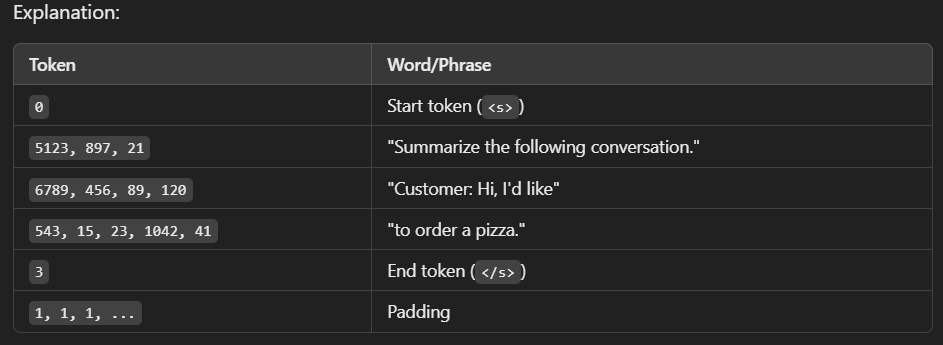

4.  Tokenizing the Summary:
- The summary "A customer orders a pizza." is tokenized separately:
```
'labels': [0, 678, 912, 34, 208, 3, 1, 1, 1, ...]
```
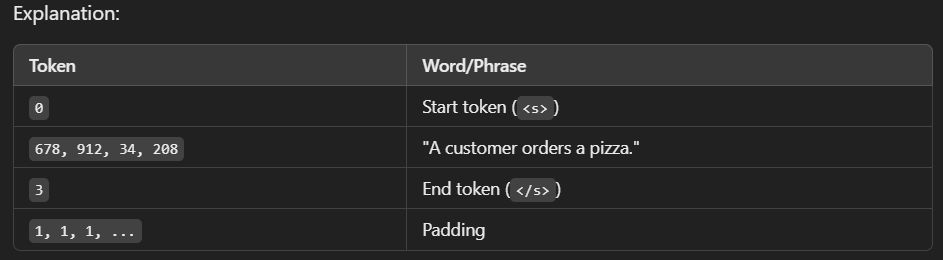

5. Final Tokenized Output:
```
{
    'input_ids': [0, 5123, 897, 21, 6789, 456, 89, 120, 543, 15, 23, 1042, 41, 3, 1, 1, ...],
    'labels': [0, 678, 912, 34, 208, 3, 1, 1, 1, ...]
}

```
6. Why  input_ids and labels :
- The format { 'input_ids': [...], 'labels': [...] } follows the structure required for training transformer models (like T5, BART, GPT, etc.) using the Hugging Face Trainer API or PyTorch DataLoader. Let's break it down.

- https://huggingface.co/docs/transformers/en/model_doc/t5

- This format is required by Hugging Face models to:

1. Train a model efficiently:

- input_ids go into the model.

- labels are the expected output.

- Support batch processing:

- Padding ensures all inputs have the same length.

6. Enable loss calculation:

- During training, the model compares its generated output with labels to compute the loss.


In [ ]:
def tokenize_function(example):
    start_prompt = 'Summarize the following conversation.\n\n'
    end_prompt = '\n\nSummary: '
    prompt = [start_prompt + dialogue + end_prompt for dialogue in example["dialogue"]]
    example['input_ids'] = tokenizer(prompt, padding="max_length", truncation=True, return_tensors="pt").input_ids
    example['labels'] = tokenizer(example["summary"], padding="max_length", truncation=True, return_tensors="pt").input_ids

    return example

# The dataset actually contains 3 diff splits: train, validation, test.
# The tokenize_function code is handling all data across all splits in batches.
tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(['id', 'topic', 'dialogue', 'summary',])

Map:   0%|          | 0/12460 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [ ]:
print(tokenized_datasets.num_rows)


{'train': 12460, 'validation': 500, 'test': 1500}


In [ ]:
## lets take a subsample datase :
# tokenized_datasets = tokenized_datasets.filter(lambda example, index: index % 100 == 0, with_indices=True)

In [ ]:
print(f"Shapes of the datasets:")
print(f"Training: {tokenized_datasets['train'].shape}")
print(f"Validation: {tokenized_datasets['validation'].shape}")
print(f"Test: {tokenized_datasets['test'].shape}")

print(tokenized_datasets)

Shapes of the datasets:
Training: (12460, 2)
Validation: (500, 2)
Test: (1500, 2)
DatasetDict({
    train: Dataset({
        features: ['input_ids', 'labels'],
        num_rows: 12460
    })
    validation: Dataset({
        features: ['input_ids', 'labels'],
        num_rows: 500
    })
    test: Dataset({
        features: ['input_ids', 'labels'],
        num_rows: 1500
    })
})


In [ ]:
# View first 5 samples from each split
train_samples = tokenized_datasets["train"].select(range(5))
val_samples = tokenized_datasets["validation"].select(range(5))
test_samples = tokenized_datasets["test"].select(range(5))

# Convert to DataFrame for better readability
df_train = pd.DataFrame(train_samples)
df_val = pd.DataFrame(val_samples)
df_test = pd.DataFrame(test_samples)

# Display the data
print("🔹 Tokenized Train Samples:")
display(df_train)

print("\n🔹 Tokenized Validation Samples:")
display(df_val)

print("\n🔹 Tokenized Test Samples:")
display(df_test)

🔹 Tokenized Train Samples:


,input_ids,labels
0,"[12198, 1635, 1737, 8, 826, 3634, 5, 1713, 345...","[1363, 5, 3931, 31, 7, 652, 3, 9, 691, 18, 413..."
1,"[12198, 1635, 1737, 8, 826, 3634, 5, 1713, 345...","[8667, 13156, 1217, 11066, 63, 21, 112, 12956,..."
2,"[12198, 1635, 1737, 8, 826, 3634, 5, 1713, 345...","[1713, 345, 13515, 536, 4663, 31, 7, 479, 21, ..."
3,"[12198, 1635, 1737, 8, 826, 3634, 5, 1713, 345...","[1713, 345, 13515, 536, 4663, 31, 7, 12603, 25..."
4,"[12198, 1635, 1737, 8, 826, 3634, 5, 1713, 345...","[1534, 8654, 5484, 7, 2504, 8511, 23, 12, 2595..."



🔹 Tokenized Validation Samples:


,input_ids,labels
0,"[12198, 1635, 1737, 8, 826, 3634, 5, 1713, 345...","[1713, 345, 13515, 357, 4663, 65, 3169, 10882,..."
1,"[12198, 1635, 1737, 8, 826, 3634, 5, 1713, 345...","[1713, 345, 13515, 536, 4663, 5484, 7, 16754, ..."
2,"[12198, 1635, 1737, 8, 826, 3634, 5, 1713, 345...","[1713, 345, 13515, 536, 4663, 1390, 12, 1190, ..."
3,"[12198, 1635, 1737, 8, 826, 3634, 5, 1713, 345...","[1713, 345, 13515, 357, 4663, 7228, 16, 412, 9..."
4,"[12198, 1635, 1737, 8, 826, 3634, 5, 1713, 345...","[1713, 345, 13515, 536, 4663, 737, 31, 17, 281..."



🔹 Tokenized Test Samples:


,input_ids,labels
0,"[12198, 1635, 1737, 8, 826, 3634, 5, 1713, 345...","[283, 7, 5, 31676, 1691, 1713, 345, 13515, 536..."
1,"[12198, 1635, 1737, 8, 826, 3634, 5, 1713, 345...","[86, 455, 12, 1709, 1652, 45, 3, 26281, 97, 30..."
2,"[12198, 1635, 1737, 8, 826, 3634, 5, 1713, 345...","[283, 7, 5, 31676, 1217, 3, 9, 3, 12194, 257, ..."
3,"[12198, 1635, 1737, 8, 826, 3634, 5, 1713, 345...","[1713, 345, 13515, 357, 4663, 16732, 1480, 250..."
4,"[12198, 1635, 1737, 8, 826, 3634, 5, 1713, 345...","[1713, 345, 13515, 357, 4663, 2204, 7, 12, 113..."


### 4. Perform Parameter Efficient Fine-Tuning (PEFT)
PEFT is a generic term that includes Low-Rank Adaptation (LoRA). In most cases, when someone says PEFT, they typically mean LoRA. LoRA, at a very high level, allows the user to fine-tune their model using fewer compute resources (in some cases, a single GPU). After fine-tuning for a specific task, use case, or tenant with LoRA, the result is that the original LLM remains unchanged and a newly-trained “LoRA adapter” emerges. This LoRA adapter is much, much smaller than the original LLM - on the order of a single-digit % of the original LLM size (MBs vs GBs).

That said, at inference time, the LoRA adapter needs to be reunited and combined with its original LLM to serve the inference request. The benefit, however, is that many LoRA adapters can re-use the original LLM which reduces overall memory requirements when serving multiple tasks and use cases.

- A visual guide: https://codecompass00.substack.com/p/what-is-lora-a-visual-guide-llm-fine-tuning

In [ ]:
from peft import LoraConfig, get_peft_model, TaskType

lora_config = LoraConfig(
    r=32, # Rank
    lora_alpha=32,
    target_modules=["q", "v"],
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.SEQ_2_SEQ_LM # FLAN-T5
)

In [ ]:
peft_model = get_peft_model(original_model,
                            lora_config)
print(print_number_of_trainable_model_parameters(peft_model))

trainable model parameters: 3538944
all model parameters: 251116800
percentage of trainable model parameters: 1.41%


In [ ]:
# !sudo rm -rf peft-dialogue-summary-checkpoint-local

In [ ]:
output_dir = f'/content/drive/MyDrive/LLM_learning/llm_training/training_backup/peft-dialogue-summary-training-{str(int(time.time()))}'

peft_training_args = TrainingArguments(
    output_dir=output_dir,
    auto_find_batch_size=True,
    learning_rate=1e-3, # Higher learning rate than full fine-tuning.
    num_train_epochs=50,
    logging_steps=1,
    max_steps=1000
)

peft_trainer = Trainer(
    model=peft_model,
    args=peft_training_args,
    train_dataset=tokenized_datasets["train"],
)

#### 4.1 Train PEFT Adapter:

In [ ]:
peft_trainer.train()

peft_model_path="/content/drive/MyDrive/LLM_learning/llm_training/training_backup/peft-dialogue-summary-checkpoint-local"

peft_trainer.model.save_pretrained(peft_model_path)
tokenizer.save_pretrained(peft_model_path)

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: deepakat002 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
1,49.750000
2,46.000000
3,42.750000
4,37.500000
5,33.250000
6,29.625000
7,28.000000
8,25.625000
9,22.250000
10,20.125000


('/content/drive/MyDrive/LLM_learning/llm_training/training_backup/peft-dialogue-summary-checkpoint-local/tokenizer_config.json',
 '/content/drive/MyDrive/LLM_learning/llm_training/training_backup/peft-dialogue-summary-checkpoint-local/special_tokens_map.json',
 '/content/drive/MyDrive/LLM_learning/llm_training/training_backup/peft-dialogue-summary-checkpoint-local/spiece.model',
 '/content/drive/MyDrive/LLM_learning/llm_training/training_backup/peft-dialogue-summary-checkpoint-local/added_tokens.json',
 '/content/drive/MyDrive/LLM_learning/llm_training/training_backup/peft-dialogue-summary-checkpoint-local/tokenizer.json')

### 5. Inferencing:

In [ ]:
from peft import PeftModel, PeftConfig

peft_model_base = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base", torch_dtype=torch.bfloat16)
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")

peft_model = PeftModel.from_pretrained(peft_model_base,
                                       '/content/drive/MyDrive/LLM_learning/llm_training/training_backup/peft-dialogue-summary-checkpoint-local/',
                                       torch_dtype=torch.bfloat16,
                                       is_trainable=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
print(print_number_of_trainable_model_parameters(peft_model))

trainable model parameters: 0
all model parameters: 251116800
percentage of trainable model parameters: 0.00%


In [ ]:

# Set device (GPU if available, otherwise CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Move models to the same device
original_model.to(device)
peft_model.to(device)

index = 110
dialogue = dataset["test"][index]["dialogue"]
baseline_human_summary = dataset["test"][index]["summary"]

# Construct the prompt
prompt = f"""
Summarize the following conversation.

{dialogue}

Summary: """

# Tokenize and move inputs to the same device as the models
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)

# Generate summaries
original_model_outputs = original_model.generate(
    input_ids=input_ids,
    generation_config=GenerationConfig(max_new_tokens=200, num_beams=1),
)
original_model_text_output = tokenizer.decode(original_model_outputs[0], skip_special_tokens=True)

peft_model_outputs = peft_model.generate(
    input_ids=input_ids,
    generation_config=GenerationConfig(max_new_tokens=200, num_beams=1),
)
peft_model_text_output = tokenizer.decode(peft_model_outputs[0], skip_special_tokens=True)

# Print results with proper formatting
dash_line = "-" * 50  # Define a separator line

print(dash_line)
print(f'BASELINE HUMAN SUMMARY:\n{baseline_human_summary}')
print(dash_line)
print(f'ORIGINAL MODEL:\n{original_model_text_output}')
print(dash_line)
print(f'PEFT MODEL:\n{peft_model_text_output}')
print(dash_line)


--------------------------------------------------
BASELINE HUMAN SUMMARY:
Simon and Cleo argue the effectiveness of demonstrations. Simon thinks they are helpful, but Cleo disagrees and refuses to go to the demonstration of helping stop the spread of nuclear weapons with Simon.
--------------------------------------------------
ORIGINAL MODEL:
Cleo: I'm going to the demonstration tomorrow to help stop the spread of nuclear weapons.
--------------------------------------------------
PEFT MODEL:
Cleo hates demonstrations because they are too complex. Simon hates demonstrations because they are too complex. Cleo wants to go to a peaceful demonstration but he plans to study for his physics exam. Simon asks the students in his political science class to go.
--------------------------------------------------


In [ ]:
dialogues = dataset['test'][0:10]['dialogue']
human_baseline_summaries = dataset['test'][0:10]['summary']

original_model_summaries = []
peft_model_summaries = []

# Move models to GPU
original_model.to("cuda")
peft_model.to("cuda")

for idx, dialogue in enumerate(dialogues):
    prompt = f"""
    Summarize the following conversation.

    {dialogue}

    Summary: """

    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")  # Move to GPU

    original_model_outputs = original_model.generate(
        input_ids=input_ids,
        generation_config=GenerationConfig(max_new_tokens=200)
    )
    original_model_text_output = tokenizer.decode(original_model_outputs[0], skip_special_tokens=True)

    peft_model_outputs = peft_model.generate(
        input_ids=input_ids,
        generation_config=GenerationConfig(max_new_tokens=200)
    )
    peft_model_text_output = tokenizer.decode(peft_model_outputs[0], skip_special_tokens=True)

    original_model_summaries.append(original_model_text_output)
    peft_model_summaries.append(peft_model_text_output)

# Create DataFrame
df = pd.DataFrame({
    'human_baseline_summaries': human_baseline_summaries,
    'original_model_summaries': original_model_summaries,
    'peft_model_summaries': peft_model_summaries
})

df


,human_baseline_summaries,original_model_summaries,peft_model_summaries
0,Ms. Dawson helps #Person1# to write a memo to ...,#Person1# asks #Person2# to take a dictation f...,Ms. Dawson asks #Person1# to take a dictation ...
1,In order to prevent employees from wasting tim...,Ms. Dawson asks #Person2# to take a dictation ...,Ms. Dawson asks #Person1# to take a dictation ...
2,Ms. Dawson takes a dictation for #Person1# abo...,#Person1# tells #Person2# #Person1#'s office c...,Ms. Dawson asks #Person1# to take a dictation ...
3,#Person2# arrives late because of traffic jam....,#Person2# is stuck in traffic and has a terrib...,#Person2# got stuck in traffic and got stuck i...
4,#Person2# decides to follow #Person1#'s sugges...,#Person2# thinks it's better to take public tr...,#Person2# got stuck in traffic and got stuck i...
5,#Person2# complains to #Person1# about the tra...,#Person1# thinks #Person2# should take public ...,#Person2# got stuck in traffic and got stuck i...
6,#Person1# tells Kate that Masha and Hero get d...,Masha and Hero are getting divorced. Masha and...,#Person1# tells Kate that Masha and Hero are g...
7,#Person1# tells Kate that Masha and Hero are g...,#Person1# and #Person2# are getting divorces f...,#Person1# tells Kate that Masha and Hero are g...
8,#Person1# and Kate talk about the divorce betw...,Kate tells #Person1# Masha and Hero are gettin...,#Person1# tells Kate that Masha and Hero are g...
9,#Person1# and Brian are at the birthday party ...,Brian invites #Person1# to the party. Brian is...,Brian's birthday is celebrated. Brian's friend...


### 6. Evaluate the Model Quantitatively (with ROUGE Metric):
- https://medium.com/nlplanet/two-minutes-nlp-learn-the-rouge-metric-by-examples-f179cc285499

```
ROUGE Metric (Recall-Oriented Understudy for Gisting Evaluation)
ROUGE is a set of evaluation metrics used to measure the quality of text summarization and generated text by comparing it to reference summaries. It checks how much overlap exists between generated text and human-written reference summaries.

Types of ROUGE Scores
ROUGE-N (e.g., ROUGE-1, ROUGE-2)

Measures n-gram overlap between the generated and reference text.

Example:

Reference: "The cat sat on the mat."

Generated: "A cat sat on a mat."

ROUGE-1 (unigrams): Matches = ["cat", "sat", "on", "mat"]

ROUGE-2 (bigrams): Matches = ["sat on", "on the"]

ROUGE-L

Based on Longest Common Subsequence (LCS).

Captures word order and sentence structure better than n-grams.

ROUGE-W

A weighted version of ROUGE-L, giving more importance to longer consecutive matches.

ROUGE-S (Skip-Bigram)

Measures overlap of pairs of words that appear in the same order but are not necessarily consecutive.

Why Use ROUGE?
Popular for summarization tasks (e.g., news summarization, dialogue summarization).

Used in NLP benchmarks like CNN/Daily Mail, Gigaword, XSum, and DialogSum datasets.

Provides Recall, Precision, and F1-Score for evaluation.


```

In [ ]:
rouge = evaluate.load('rouge') ### Higher score is good

original_model_results = rouge.compute(
    predictions=original_model_summaries,
    references=human_baseline_summaries[0:len(original_model_summaries)],
    use_aggregator=True,
    use_stemmer=True,
)

peft_model_results = rouge.compute(
    predictions=peft_model_summaries,
    references=human_baseline_summaries[0:len(peft_model_summaries)],
    use_aggregator=True,
    use_stemmer=True,
)

print('ORIGINAL MODEL:')
print(original_model_results)

print('PEFT MODEL:')
print(peft_model_results)

ORIGINAL MODEL:
{'rouge1': np.float64(0.3818716004391909), 'rouge2': np.float64(0.09193091478228849), 'rougeL': np.float64(0.26022142058824516), 'rougeLsum': np.float64(0.26277556322146356)}
PEFT MODEL:
{'rouge1': np.float64(0.4200651585971851), 'rouge2': np.float64(0.1779617050691509), 'rougeL': np.float64(0.34616421641494144), 'rougeLsum': np.float64(0.348487172144634)}
